In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clean_df(df):
    df = df.fillna(-1)
    df = df.replace(r'[^0-9]+',-1)
    df = df.replace('',-1)
    df = df.replace(' ',-1)
    df = df.replace('\n',-1)
    return df

In [3]:
data = pd.read_csv("results.csv", delim_whitespace=True) 
data = clean_df(data)

# data = data.drop([0])

data["Clock"] = pd.to_numeric(data["Clock"],errors='coerce')
data["BrMisAll"] = pd.to_numeric(data["BrMisAll"],errors='coerce')
data["BrIndir"] = pd.to_numeric(data["BrIndir"],errors='coerce')
data["BrMispInd"] = pd.to_numeric(data["BrMispInd"],errors='coerce')
data["BrClear"] = pd.to_numeric(data["BrClear"],errors='coerce')


num_rows = len(data)
num_targets = pd.Series([(i // 50 + 1) for i in range(num_rows)])
data["TargetNum"] = num_targets


for i in range(num_rows // 50):
    data = data.drop(50*i)
    data = data.drop(50*i + 1)
    
# data["Dec-uops"] = pd.to_numeric(data["Dec-uops"],errors='coerce')
# data["DSB-uops"] = pd.to_numeric(data["DSB-uops"],errors='coerce')
# data["LSD-uops"] = pd.to_numeric(data["LSD-uops"],errors='coerce')
# data["Dec-uops"] = (data["Dec-uops"]) / (data["DSB-uops"])
# data["LSD-uops"] = (data["LSD-uops"]) / (data["DSB-uops"])
# data["DSB-uops"] = (data["DSB-uops"]) / (data["BrRetired"])


#data["BrRetired"] = (data["BrRetired"]) // 1000
#data["ICacheMiss"] = (data["ICacheMiss"]) / (data["BrRetired"]*1000)
#data["Clock"] = (data["Clock"]) / (data["BrRetired"]*1000)
data["Test_num"] = data["BrIndir"] / 5
data["BrMispInd_Rate"] = data["BrMispInd"] / data["BrIndir"]

# mode_value = data['BrRetired'].mode()[0]
# data['BrRetired'] = data['BrRetired'].apply(lambda x: mode_value if x != mode_value else x)

In [4]:
data

,Clock,BrMisAll,BrIndir,BrMispInd,BrClear,TargetNum,Test_num,BrMispInd_Rate
2,1844,1,20,0,0,1,4.0,0.000000
3,1840,1,20,0,0,1,4.0,0.000000
4,1822,0,20,0,0,1,4.0,0.000000
5,1824,0,20,0,0,1,4.0,0.000000
6,1824,0,20,0,0,1,4.0,0.000000
...,...,...,...,...,...,...,...,...
115495,1193015374,89136,46200,45717,3338,2310,9240.0,0.989545
115496,1188217925,97207,46200,45849,5020,2310,9240.0,0.992403
115497,1185352989,89747,46200,45668,3977,2310,9240.0,0.988485
115498,1182872757,88560,46200,45421,2598,2310,9240.0,0.983139


In [1]:

def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(20,8),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()

p = sns.lineplot(data=data, x="TargetNum", y="BrMispInd_Rate", marker="o", color=sns.color_palette("Set1")[2], linewidth=2.5, markersize = 0, errorbar=None)
p.grid()
# p.set_xscale('log', base=2)
# p.set(xlim=(0,9))
# p.set(ylim=(0,3))

# Saving the Seaborn Figure:
# plt.savefig('res.pdf', bbox_inches='tight')

NameError: name 'plt' is not defined

In [ ]:
# Select the columns to use for the bar plot
cols = ["LSD-uops", "DSB-uops", "Dec-uops"]

# Group the data by "BrRetired" and calculate the mean for each group
grouped = data.groupby("BrRetired")[cols].mean()

# Calculate the total sum for each row
totals = grouped.sum(axis=1)

# Calculate the percentage of each data point over the total sum for each row
percentages = grouped.div(totals, axis=0)

# Reset the index to make "BrRetired" a column again
percentages = percentages.reset_index()

# Melt the dataframe to create a "long" format for Seaborn
melted = pd.melt(percentages, id_vars="BrRetired", var_name="Data", value_name="Percentage")

# Pivot the melted dataframe to create a "wide" format for Seaborn
pivot = melted.pivot(index="BrRetired", columns="Data", values="Percentage")

# Create the bar plot using Seaborn
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")
sns.set_palette("colorblind")
sns.set_context("talk")
ax = pivot.plot(kind="bar", stacked=True, width=2)

# Set the axis labels and legend
ax.legend(title="Data", loc="center right",bbox_to_anchor=(1.25, 0.5), frameon=False)
ax.set_xlabel("BrRetired")
ax.set_ylabel("Percentage")
# ax.set(xlim=(0,512))

# Remove the x-tick labels
ax.set_xticklabels([])
    
# Show the plot
plt.show()

KeyError: "Columns not found: 'LSD-uops', 'DSB-uops', 'Dec-uops'"

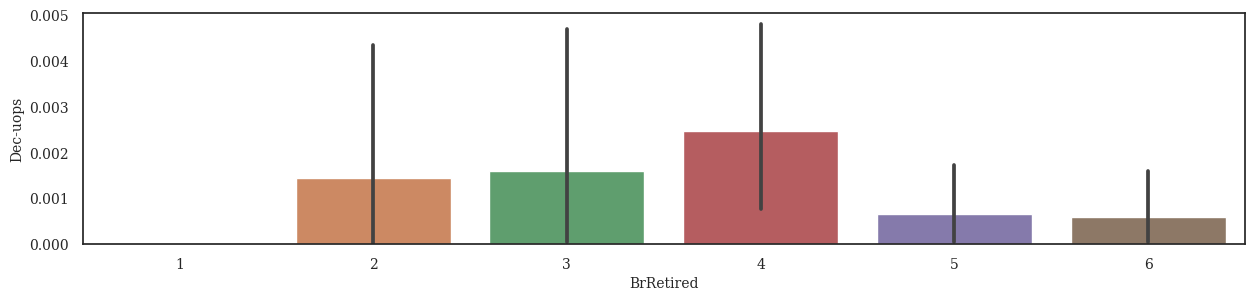

In [ ]:
def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(15,3),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()

g = sns.barplot(data=data, x="BrRetired", y="Dec-uops")